In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [271]:
data = pd.read_csv('malicious_phish.csv', index_col=False)
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


Finding all null values in the data

In [273]:
data.isnull().sum()

url     0
type    0
dtype: int64

In [274]:
data.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


Find all duplicated urls in the dataset

In [275]:
duplicates = data.duplicated(subset='url')
print(len(list(filter(lambda x: x, duplicates))))

10072


Drop duplicated urls

In [276]:
unique = data.drop_duplicates(subset='url')
unique.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [277]:
unique.describe()

,url,type
count,641119,641119
unique,641119,4
top,br-icloud.com.br,benign
freq,1,428080


In [278]:
data = unique

Value counts of type attribute in dataset

In [279]:
value_counts = data.type.value_counts()
value_counts

benign        428080
defacement     95308
phishing       94086
malware        23645
Name: type, dtype: int64

Plot a barplot for original dataset

Text(0, 0.5, 'Count')

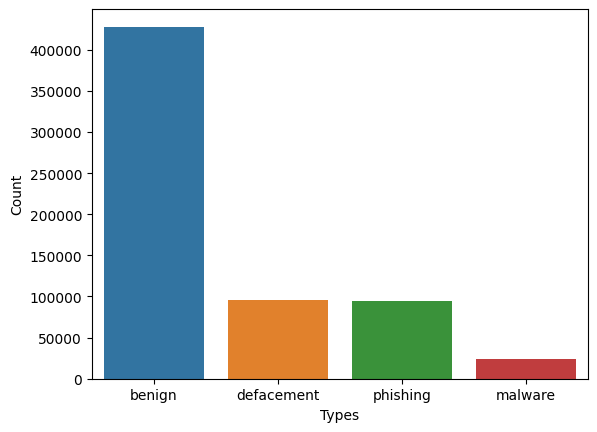

In [280]:
import seaborn as sns
labelX = value_counts.index
sns.barplot(x=labelX, y=value_counts)
plt.xlabel('Types')
plt.ylabel('Count')

Malware and Defacement can also be considered as Phishing websites as they are directed to false urls in the pursuit of planting or hacking data by some form of social engineering.

In [281]:
data['type'].replace({'malware': 'phishing', 'defacement': 'phishing'}, inplace=True)

Feature Engineering

Length of URL

In [282]:
data['length_of_url'] = data['url'].apply(lambda url: len(url) )
data.head()

,url,type,length_of_url
0,br-icloud.com.br,phishing,16
1,mp3raid.com/music/krizz_kaliko.html,benign,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,31
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235


Get all special characters from URL

In [283]:
features = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for feature in features:
    data[feature] = data['url'].apply(lambda i: i.count(feature))
data.head()

,url,type,length_of_url,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,16,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,0,1,1,4,3,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,0,1,1,3,2,0,0,0,0,0,0,0,1


Check if the url is abnormal

In [284]:
from urllib.parse import urlparse
import re
def check_url(url):
    match = re.search(str(urlparse(url).hostname), url)
    if match:
        return 1
    else:
        return 0
data['abnormal_url'] = data['url'].apply(lambda i: check_url(i))
print(data.abnormal_url.value_counts())
data.head()

0    463156
1    177963
Name: abnormal_url, dtype: int64


,url,type,length_of_url,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url
0,br-icloud.com.br,phishing,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,0,1,1,4,3,0,0,0,0,0,0,0,1,1
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,0,1,1,3,2,0,0,0,0,0,0,0,1,1


Check if it is a https (secure) website

In [285]:
def check_https(url):
    match = str(urlparse(url).scheme)
    if match=='https':
        return 1
    else:
        return 0
data['https_scheme'] = data.url.apply(lambda url: check_https(url))
print(data.https_scheme.value_counts())
data.head()

0    625482
1     15637
Name: https_scheme, dtype: int64


,url,type,length_of_url,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https_scheme
0,br-icloud.com.br,phishing,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,0,1,1,4,3,0,0,0,0,0,0,0,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,0,1,1,3,2,0,0,0,0,0,0,0,1,1,0


Count number of numeric and alphabetic characters in the url string

In [286]:
def count_numbers(url):
    count = 0
    for itr in url:
        if itr.isnumeric():
            count+=1
    return count
def count_alphabets(url):
    count = 0
    for itr in url:
        if itr.isalpha():
            count+=1
    return count
data['count_numbers'] = data.url.apply(lambda url: count_numbers(url))
data['count_alphabets'] = data.url.apply(lambda url: count_alphabets(url))
data.head()

,url,type,length_of_url,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https_scheme,count_numbers,count_alphabets
0,br-icloud.com.br,phishing,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,25
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,0,1,1,4,3,0,0,0,0,0,0,0,1,1,0,7,63
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,0,1,1,3,2,0,0,0,0,0,0,0,1,1,0,22,199


Check if the url is valid or an IP address

In [287]:
#Taken from @sid321xan notebook from kaggle
def is_url_ip_address(url: str) -> bool:
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0
    
data['is_ip'] = data['url'].apply(lambda url: is_url_ip_address(url))
data.head()

,url,type,length_of_url,@,?,-,=,.,#,%,...,$,!,*,",",//,abnormal_url,https_scheme,count_numbers,count_alphabets,is_ip
0,br-icloud.com.br,phishing,16,0,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,1,25,0
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,0,1,1,4,3,0,0,...,0,0,0,0,1,1,0,7,63,0
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,0,1,1,3,2,0,0,...,0,0,0,0,1,1,0,22,199,0


In [288]:
data.is_ip.value_counts()

0    628642
1     12477
Name: is_ip, dtype: int64

Get all domain level features

In [327]:
from tld import get_tld
def proc_tld(url):
    if url.startswith('http:'):
        res = get_tld(url, as_object = True, fail_silently=False, fix_protocol=False)
    else:
        res = get_tld(url, as_object = True, fail_silently=False, fix_protocol=True)
    return len(res.subdomain), len(res.domain), len(res.tld), len(res.fld)

def proc_tld_url(entry):
    try:
        if entry['is_ip'] == 0:
            return proc_tld(entry['url'])
        return 'invalid', 'invalid', 'invalid', 'invalid'
    except Exception as e:
        return 'badurl', 'badurl', 'badurl', 'badurl'

data[['subdomain', 'domain', 'tld', 'fld']] = data.apply(lambda entry: proc_tld_url(entry), axis=1, result_type="expand")
data.head()

,url,type,length_of_url,@,?,-,=,.,#,%,...,count_alphabets,is_ip,subdomain,domain,tld,fld,short_url,url_path_length,numeric_ratio,character_ratio
0,br-icloud.com.br,1,16,0,0,1,0,2,0,0,...,13,0,0,9,6,16,0,1,0.000000,0.812500
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,0,0,0,2,0,0,...,29,0,0,7,3,11,0,3,0.028571,0.828571
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,0,0,0,2,0,0,...,25,0,0,10,3,14,0,4,0.032258,0.806452
3,http://www.garage-pirenne.be/index.php?option=...,1,88,0,1,1,4,3,0,0,...,63,0,3,14,2,17,0,2,0.079545,0.715909
4,http://adventure-nicaragua.net/index.php?optio...,1,235,0,1,1,3,2,0,0,...,199,0,0,19,3,23,0,2,0.093617,0.846809


In [290]:
data[['subdomain', 'domain', 'tld', 'fld']].value_counts()

subdomain  domain  tld  fld 
0.0        8.0     3.0  12.0    36915
           7.0     3.0  11.0    36755
           6.0     3.0  10.0    28916
           10.0    3.0  14.0    25520
           9.0     3.0  13.0    24684
                                ...  
48.0       17.0    3.0  21.0        1
           15.0    3.0  19.0        1
           14.0    3.0  18.0        1
           13.0    2.0  16.0        1
10.0       7.0     7.0  15.0        1
Length: 4701, dtype: int64

Check if the url is a shortened url

In [291]:
#Taken from @habibmrad notebook from kaggle
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
data['short_url'] = data.url.apply(lambda url: Shortining_Service(url))
data.head()


,url,type,length_of_url,@,?,-,=,.,#,%,...,abnormal_url,https_scheme,count_numbers,count_alphabets,is_ip,subdomain,domain,tld,fld,short_url
0,br-icloud.com.br,phishing,16,0,0,1,0,2,0,0,...,0,0,0,13,0,0.0,9.0,6.0,16.0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,0,0,2,0,0,...,0,0,1,29,0,0.0,7.0,3.0,11.0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,0,0,2,0,0,...,0,0,1,25,0,0.0,10.0,3.0,14.0,0
3,http://www.garage-pirenne.be/index.php?option=...,phishing,88,0,1,1,4,3,0,0,...,1,0,7,63,0,3.0,14.0,2.0,17.0,0
4,http://adventure-nicaragua.net/index.php?optio...,phishing,235,0,1,1,3,2,0,0,...,1,0,22,199,0,0.0,19.0,3.0,23.0,0


In [292]:
data.short_url.value_counts()

0    601703
1     39416
Name: short_url, dtype: int64

Get URL path length

In [329]:
def url_path(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False, fix_protocol=True)
        path = ''
        if res.parsed_url.query:
            path = res.parsed_url.path + res.parsed_url.query
        else:
            path = res.parsed_url.path
        return len(path.split('/'))
    except:
        return None
data['url_path_length'] = data.url.apply(lambda url: url_path(url))
data.head()

,url,type,length_of_url,@,?,-,=,.,#,%,...,count_alphabets,is_ip,subdomain,domain,tld,fld,short_url,url_path_length,numeric_ratio,character_ratio
0,br-icloud.com.br,1,16,0,0,1,0,2,0,0,...,13,0,0,9,6,16,0,1.0,0.000000,0.812500
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,0,0,0,2,0,0,...,29,0,0,7,3,11,0,3.0,0.028571,0.828571
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,0,0,0,2,0,0,...,25,0,0,10,3,14,0,4.0,0.032258,0.806452
3,http://www.garage-pirenne.be/index.php?option=...,1,88,0,1,1,4,3,0,0,...,63,0,3,14,2,17,0,2.0,0.079545,0.715909
4,http://adventure-nicaragua.net/index.php?optio...,1,235,0,1,1,3,2,0,0,...,199,0,0,19,3,23,0,2.0,0.093617,0.846809


In [296]:
data.shape

(641119, 27)

In [297]:
data.head()

,url,type,length_of_url,@,?,-,=,.,#,%,...,https_scheme,count_numbers,count_alphabets,is_ip,subdomain,domain,tld,fld,short_url,url_path_length
0,br-icloud.com.br,1,16,0,0,1,0,2,0,0,...,0,0,13,0,0.0,9.0,6.0,16.0,0,1.0
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,0,0,0,2,0,0,...,0,1,29,0,0.0,7.0,3.0,11.0,0,3.0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,0,0,0,2,0,0,...,0,1,25,0,0.0,10.0,3.0,14.0,0,4.0
3,http://www.garage-pirenne.be/index.php?option=...,1,88,0,1,1,4,3,0,0,...,0,7,63,0,3.0,14.0,2.0,17.0,0,2.0
4,http://adventure-nicaragua.net/index.php?optio...,1,235,0,1,1,3,2,0,0,...,0,22,199,0,0.0,19.0,3.0,23.0,0,2.0


Ratio of characters to their length could be a better indicator as opposed to number of characters

In [298]:
data['numeric_ratio'] = data.apply(lambda entry: entry['count_numbers']/entry['length_of_url'], axis=1)
data['character_ratio'] = data.apply(lambda entry: entry['count_alphabets']/entry['length_of_url'], axis=1)
data.head()

,url,type,length_of_url,@,?,-,=,.,#,%,...,count_alphabets,is_ip,subdomain,domain,tld,fld,short_url,url_path_length,numeric_ratio,character_ratio
0,br-icloud.com.br,1,16,0,0,1,0,2,0,0,...,13,0,0.0,9.0,6.0,16.0,0,1.0,0.000000,0.812500
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,0,0,0,2,0,0,...,29,0,0.0,7.0,3.0,11.0,0,3.0,0.028571,0.828571
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,0,0,0,2,0,0,...,25,0,0.0,10.0,3.0,14.0,0,4.0,0.032258,0.806452
3,http://www.garage-pirenne.be/index.php?option=...,1,88,0,1,1,4,3,0,0,...,63,0,3.0,14.0,2.0,17.0,0,2.0,0.079545,0.715909
4,http://adventure-nicaragua.net/index.php?optio...,1,235,0,1,1,3,2,0,0,...,199,0,0.0,19.0,3.0,23.0,0,2.0,0.093617,0.846809


Description of generated dataset with engineered features

In [302]:
data.describe()

,type,length_of_url,@,?,-,=,.,#,%,+,...,count_alphabets,is_ip,subdomain,domain,tld,fld,short_url,url_path_length,numeric_ratio,character_ratio
count,641119.000000,641119.00000,641119.000000,641119.000000,641119.000000,641119.000000,641119.000000,641119.000000,641119.000000,641119.000000,...,641119.000000,641119.000000,628553.000000,628553.000000,628553.000000,628553.000000,641119.000000,628904.000000,641119.000000,641119.000000
mean,0.332292,59.76247,0.002243,0.221391,1.561364,0.591642,2.193950,0.000884,0.398489,0.069463,...,45.179165,0.019461,2.986665,9.925216,3.188679,14.113399,0.061480,3.384784,0.070980,0.777544
std,0.471036,44.89459,0.054507,0.440003,2.984744,1.491306,1.491449,0.032580,4.166377,0.626015,...,31.735030,0.138140,10.236944,4.930383,1.395773,5.258079,0.240209,1.659306,0.100210,0.116276
min,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,32.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,25.000000,0.000000,0.000000,6.000000,3.000000,10.000000,0.000000,2.000000,0.000000,0.735294
50%,0.000000,47.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,37.000000,0.000000,0.000000,9.000000,3.000000,13.000000,0.000000,3.000000,0.031250,0.800000
75%,1.000000,76.00000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,...,58.000000,0.000000,3.000000,13.000000,3.000000,17.000000,0.000000,4.000000,0.104651,0.857143
max,1.000000,2175.00000,10.000000,20.000000,87.000000,51.000000,42.000000,6.000000,231.000000,37.000000,...,2141.000000,1.000000,230.000000,63.000000,41.000000,76.000000,1.000000,40.000000,1.000000,1.000000


89

Let's start with analysing the data

Barplot for the dataset yields in a very unbalanced dataset leaning towards benign

Text(0, 0.5, 'Count')

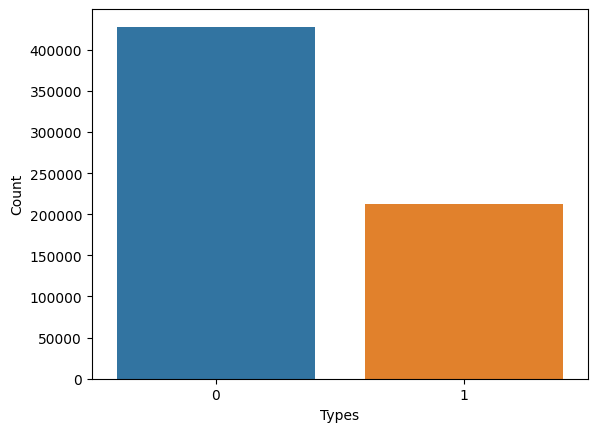

In [188]:
value_counts = data['type'].value_counts()
value_counts
labelX = value_counts.index
sns.barplot(x=labelX, y=value_counts)
plt.xlabel('Types')
plt.ylabel('Count')

In [190]:
benign_urls = data[data['type'] == 0]
benign_urls

,url,type,length_of_url,@,?,-,=,.,#,%,...,count_alphabets,is_ip,subdomain,domain,tld,fld,short_url,url_path_length,numeric_ratio,character_ratio
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,0,0,0,2,0,0,...,29,0,0.0,7.0,3.0,11.0,0,3.0,0.028571,0.828571
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,0,0,0,2,0,0,...,25,0,0.0,10.0,3.0,14.0,0,4.0,0.032258,0.806452
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,0,118,0,0,16,0,2,0,0,...,93,0,0.0,7.0,3.0,11.0,0,4.0,0.008475,0.788136
6,espn.go.com/nba/player/_/id/3457/brandon-rush,0,45,0,0,1,0,2,0,0,...,31,0,4.0,2.0,3.0,6.0,0,7.0,0.088889,0.688889
7,yourbittorrent.com/?q=anthony-hamilton-soulife,0,46,0,1,2,1,1,0,0,...,40,0,0.0,14.0,3.0,18.0,1,2.0,0.000000,0.869565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603177,imetrica.net/css/,0,17,0,0,0,0,1,0,0,...,14,0,0.0,8.0,3.0,12.0,0,3.0,0.000000,0.823529
603178,www.idxband.com/telin/images/e-online.php,0,41,0,0,1,0,3,0,0,...,34,0,3.0,7.0,3.0,11.0,0,4.0,0.000000,0.829268
603179,www.coffeewithsophieinc.com/media/system/js/ca...,0,71,0,0,0,0,4,0,0,...,60,0,3.0,19.0,3.0,23.0,0,6.0,0.028169,0.845070
603180,conseguircreditos.webs.tl/,0,26,0,0,0,0,2,0,0,...,23,0,17.0,4.0,2.0,7.0,0,2.0,0.000000,0.884615


In [191]:
phishing_urls = data[data['type'] == 1]
phishing_urls

,url,type,length_of_url,@,?,-,=,.,#,%,...,count_alphabets,is_ip,subdomain,domain,tld,fld,short_url,url_path_length,numeric_ratio,character_ratio
0,br-icloud.com.br,1,16,0,0,1,0,2,0,0,...,13,0,0.0,9.0,6.0,16.0,0,1.0,0.000000,0.812500
3,http://www.garage-pirenne.be/index.php?option=...,1,88,0,1,1,4,3,0,0,...,63,0,3.0,14.0,2.0,17.0,0,2.0,0.079545,0.715909
4,http://adventure-nicaragua.net/index.php?optio...,1,235,0,1,1,3,2,0,0,...,199,0,0.0,19.0,3.0,23.0,0,2.0,0.093617,0.846809
8,http://www.pashminaonline.com/pure-pashminas,1,44,0,0,1,0,2,0,0,...,37,0,3.0,14.0,3.0,18.0,0,2.0,0.000000,0.840909
11,http://www.ikenmijnkunst.nl/index.php/expositi...,1,64,0,0,1,0,3,0,0,...,50,0,3.0,13.0,2.0,16.0,0,4.0,0.062500,0.781250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,0,0,0,0,3,0,0,...,21,0,7.0,3.0,3.0,7.0,0,4.0,0.307692,0.538462
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,0,0,2,0,2,0,0,...,29,0,5.0,8.0,3.0,12.0,1,5.0,0.159091,0.659091
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,0,0,0,0,2,0,0,...,33,0,3.0,8.0,3.0,12.0,1,5.0,0.071429,0.785714
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,0,0,0,0,2,0,0,...,36,0,2.0,9.0,3.0,13.0,0,3.0,0.000000,0.800000


In [192]:
print(benign_urls.shape)
print(phishing_urls.shape)

(428080, 29)
(213039, 29)


We resample the dataset using random undersampling

In [196]:
benign_urls_downsampled = benign_urls.sample(len(phishing_urls))
benign_urls_downsampled.shape

(213039, 29)

In [197]:
data = pd.concat([benign_urls_downsampled, phishing_urls])
value_counts = data['type'].value_counts()
value_counts

0    213039
1    213039
Name: type, dtype: int64

Text(0, 0.5, 'Count')

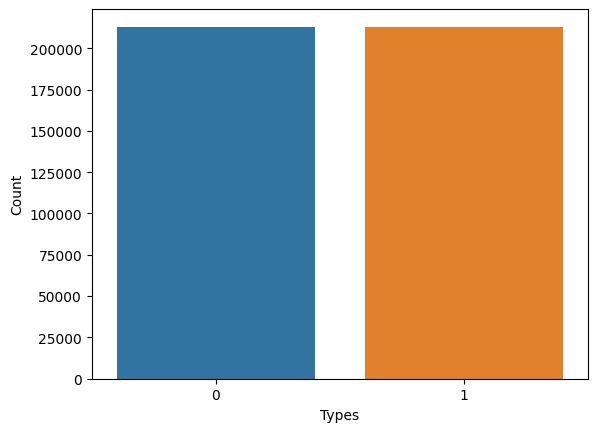

In [198]:
labelX = value_counts.index
sns.barplot(x=labelX, y=value_counts)
plt.xlabel('Types')
plt.ylabel('Count')

In [269]:

temp = data
temp['type'].replace({'phishing': 1, 'benign': 0}, inplace=True)
value_counts = temp['type'].value_counts()
value_counts


In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(temp.corr(), linewidths=.5)

In [330]:
data.isna().sum()

url                    0
type                   0
length_of_url          0
@                      0
?                      0
-                      0
=                      0
.                      0
#                      0
%                      0
+                      0
$                      0
!                      0
*                      0
,                      0
//                     0
abnormal_url           0
https_scheme           0
count_numbers          0
count_alphabets        0
is_ip                  0
subdomain              0
domain                 0
tld                    0
fld                    0
short_url              0
url_path_length    12215
numeric_ratio          0
character_ratio        0
dtype: int64

In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641119 entries, 0 to 651190
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   url              641119 non-null  object 
 1   type             641119 non-null  int64  
 2   length_of_url    641119 non-null  int64  
 3   @                641119 non-null  int64  
 4   ?                641119 non-null  int64  
 5   -                641119 non-null  int64  
 6   =                641119 non-null  int64  
 7   .                641119 non-null  int64  
 8   #                641119 non-null  int64  
 9   %                641119 non-null  int64  
 10  +                641119 non-null  int64  
 11  $                641119 non-null  int64  
 12  !                641119 non-null  int64  
 13  *                641119 non-null  int64  
 14  ,                641119 non-null  int64  
 15  //               641119 non-null  int64  
 16  abnormal_url     641119 non-null  int6

$ // abnormal_url is_ip
update as you go
plot the barplots for these features

1    142578
0     36052
Name: type, dtype: int64

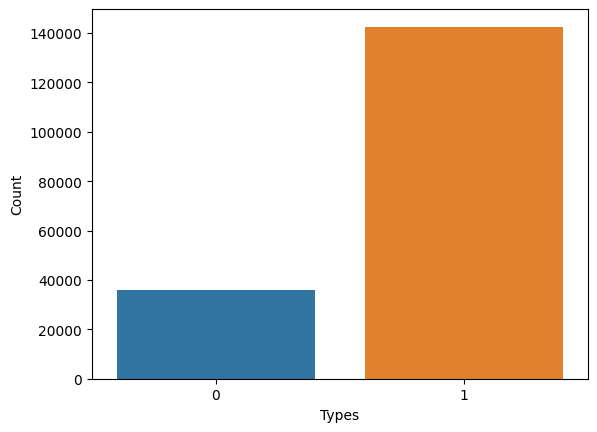

In [397]:
with_special_caharacters = data[data['//']>0]
sns.barplot(x=with_special_caharacters['type'].value_counts().index, y=with_special_caharacters['type'].value_counts())
plt.xlabel('Types')
plt.ylabel('Count')
with_special_caharacters['type'].value_counts()


1    63
0    33
Name: type, dtype: int64

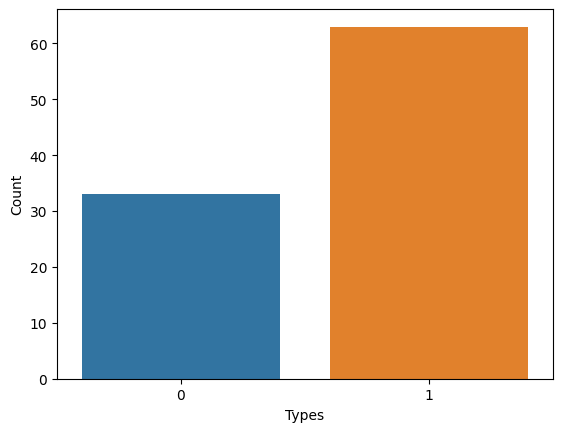

In [398]:
with_special_caharacters = data[data['$']>0]
sns.barplot(x=with_special_caharacters['type'].value_counts().index, y=with_special_caharacters['type'].value_counts())
plt.xlabel('Types')
plt.ylabel('Count')
with_special_caharacters['type'].value_counts()

1    142569
0     35394
Name: type, dtype: int64

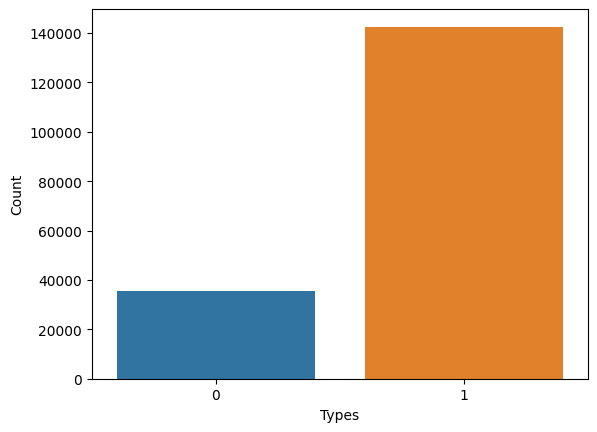

In [399]:
abnormal_url = data[data['abnormal_url']>0]
sns.barplot(x=abnormal_url['type'].value_counts().index, y=abnormal_url['type'].value_counts())
plt.xlabel('Types')
plt.ylabel('Count')
abnormal_url['type'].value_counts()

1    12273
0      204
Name: type, dtype: int64

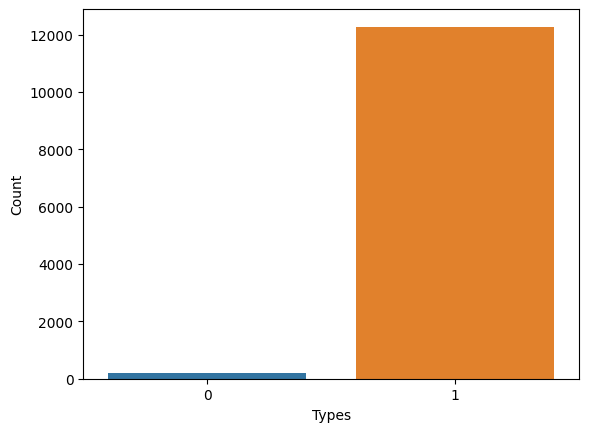

In [400]:
is_ip = data[data['is_ip']>0]
sns.barplot(x=is_ip['type'].value_counts().index, y=is_ip['type'].value_counts())
plt.xlabel('Types')
plt.ylabel('Count')
is_ip['type'].value_counts()

In [413]:
subdmoain = data[data['subdomain']>0]
sns.barplot(x=subdmoain['type'].value_counts().index, y=subdmoain['type'].value_counts())
plt.xlabel('Types')
plt.ylabel('Count')
subdmoain['type'].value_counts()

TypeError: '>' not supported between instances of 'str' and 'int'

Replace strings from domain features with integer values

In [421]:
temp = data
def replace_strings(df, attr):
    df[attr].replace({'invalid':-1, 'badurl':-2}, inplace=True)
    return df
for itr in ['subdomain', 'domain', 'tld', 'fld']:
    temp = replace_strings(temp, itr)
temp.head()

,url,type,length_of_url,@,?,-,=,.,#,%,...,count_alphabets,is_ip,subdomain,domain,tld,fld,short_url,url_path_length,numeric_ratio,character_ratio
0,br-icloud.com.br,1,16,0,0,1,0,2,0,0,...,13,0,0,9,6,16,0,1.0,0.000000,0.812500
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,0,0,0,2,0,0,...,29,0,0,7,3,11,0,3.0,0.028571,0.828571
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,0,0,0,2,0,0,...,25,0,0,10,3,14,0,4.0,0.032258,0.806452
3,http://www.garage-pirenne.be/index.php?option=...,1,88,0,1,1,4,3,0,0,...,63,0,3,14,2,17,0,2.0,0.079545,0.715909
4,http://adventure-nicaragua.net/index.php?optio...,1,235,0,1,1,3,2,0,0,...,199,0,0,19,3,23,0,2.0,0.093617,0.846809


In [422]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641119 entries, 0 to 651190
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   url              641119 non-null  object 
 1   type             641119 non-null  int64  
 2   length_of_url    641119 non-null  int64  
 3   @                641119 non-null  int64  
 4   ?                641119 non-null  int64  
 5   -                641119 non-null  int64  
 6   =                641119 non-null  int64  
 7   .                641119 non-null  int64  
 8   #                641119 non-null  int64  
 9   %                641119 non-null  int64  
 10  +                641119 non-null  int64  
 11  $                641119 non-null  int64  
 12  !                641119 non-null  int64  
 13  *                641119 non-null  int64  
 14  ,                641119 non-null  int64  
 15  //               641119 non-null  int64  
 16  abnormal_url     641119 non-null  int6

In [406]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641119 entries, 0 to 651190
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   url              641119 non-null  object 
 1   type             641119 non-null  int64  
 2   length_of_url    641119 non-null  int64  
 3   @                641119 non-null  int64  
 4   ?                641119 non-null  int64  
 5   -                641119 non-null  int64  
 6   =                641119 non-null  int64  
 7   .                641119 non-null  int64  
 8   #                641119 non-null  int64  
 9   %                641119 non-null  int64  
 10  +                641119 non-null  int64  
 11  $                641119 non-null  int64  
 12  !                641119 non-null  int64  
 13  *                641119 non-null  int64  
 14  ,                641119 non-null  int64  
 15  //               641119 non-null  int64  
 16  abnormal_url     641119 non-null  int6